<a href="https://colab.research.google.com/github/Nils1511/ImageProcessing/blob/main/IP_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question_1

AWGN(Additive White Gaussian Noise) 

Additive: In an AWGN channel, noise is introduced to the signal of interest via addition. Rather than multiplicative, the received signal consists of the original, uncorrupted transmit signal (blue waveform in the image below) plus the noise signal (orange waveform).

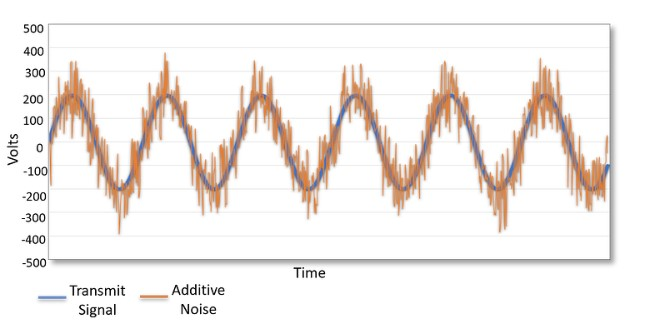

White: The term “white” is in reference to the noise having the same power distribution across every frequency. This means white noise’s power spectral density (PSD), which is a representation of power vs. frequency, will be constant. It is also a direct link to white light, which combines all visible spectrum colors at a uniform intensity.


Gaussian: Also called a normal distribution, a Gaussian probability distribution of events has a zero average in the time domain, follows a bell curve, and is symmetric about the mean.

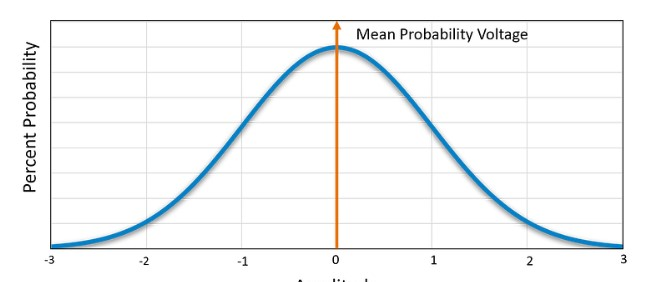

In [ ]:
import numpy as np
import cv2
def awgn(img,var):
    mean = 0
    sigma = np.sqrt(var)
    gaussian = np.random.normal(mean, sigma, img.shape)  # shape is the number of elements you get in array noise

    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
      for i in range(img.shape[-1]):
        noisy_image[:, :, i] = img[:, :, i] + gaussian[:, :, i]

    return noisy_image 

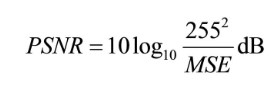

PSNR(Peak signal-to-noise ratio) is the ratio of the maximum value of the pixel to the noise.

In [ ]:
import math
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr().astype(np.float64)



SSIM(Structural Similarity Index Measure) is used for measuring the similarity between two images or the measurement or prediction of image quality is based on an initial uncompressed or distortion-free image as reference

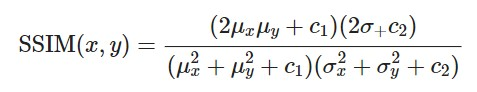

Here,
μₓ = pixel sample mean of window x

μₓ = pixel sample mean of window y

(σₓ)^2 = variance of x

(σᵥ)^2 = variance of y

σₓᵥ the covariance of x and y

c1=(k1L)^2, c2=(k2L)^2 two variables to stabilize the division with weak denominator

L the dynamic range of the pixel-values (typically this is 2^{bits per pixel}-1})

 k1=0.01 and k2=0.03 by default.

In [ ]:
import cv2
def ssim(img1, img2):                                 # img1 is original and img2 is noisy image
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2
    kernel = cv2.getGaussianKernel(11, sigma)
    window = np.outer(kernel, kernel.transpose())
    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  #  find the average of 
                                                      #  all the pixels to make it the central pixel value
                                                      #  and the process repeats for all the pixels in the image
                                                      #  for only [5:-5, 5:-5]part of original image 
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean.astype(np.float64)

Isotropic Gaussian blurring (Gaussian low pass filtering) 

In [ ]:
from scipy import ndimage
import math

def iso_gau_blur(noisy_img, var):
  sigma = math.sqrt(var)
  blur = cv2.GaussianBlur(noisy_img,(0,0),sigma,sigma)
  return blur

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


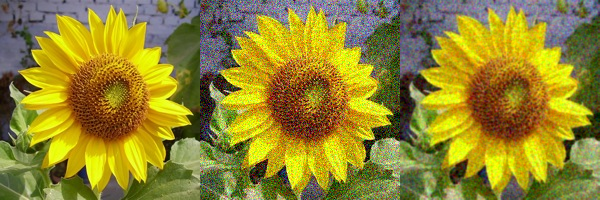

In [ ]:
# testing the above defined functions
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread("/content/gdrive/MyDrive/EE 610 /assignment 3/tint1.jpg",1)
noisy = awgn(img,1000)
filtered = iso_gau_blur(noisy,0.5)
horizontal_concat = np. concatenate((img, noisy,filtered), axis=1)
cv2_imshow(horizontal_concat)

## Question_2

Hard thresholding

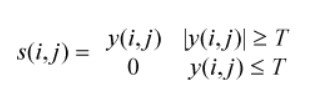


where s(i,j) are the wavelet coefficients which are deniosed and T is the general threshold which is defined as 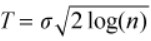 where n is the count of the wavelet coefficients and σ is the standard deviation of the noise

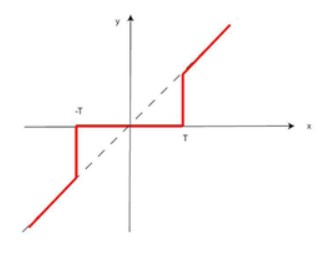

In [ ]:
import cv2
import numpy as np
def hard_threshold(img,thres):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  for i in range(img.size(0)):
    for j in range(img.size(1)):
      if img[i][j]>thres or img[i][j]<thres:
        img[i][j] = img[i][j]
      else:
         img[i][j] == 0
  return img


Soft thresholding

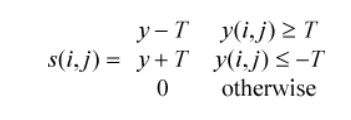

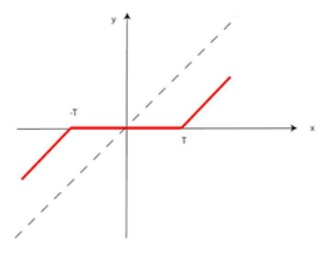

In [ ]:
import cv2
import numpy as np
def soft_threshold(img,thres):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  for i in range(img.size(0)):
    for j in range(img.size(1)):
      if img[i][j]>thres:
        img[i][j] = img[i][j] - thres
      elif img[i][j]<thres:
        img[i][j] = img[i][j] + thres
      else:
        img[i][j] == 0
  return img


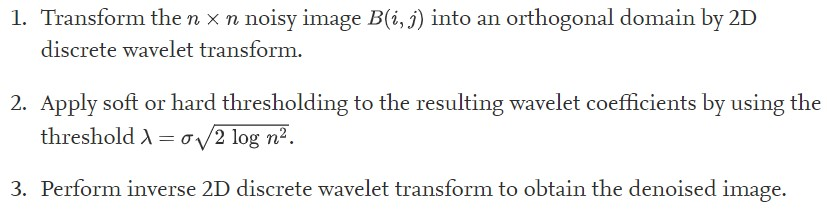

In [ ]:
import numpy as np
import pywt
import math
def chen(noisy):
  data = np.array(noisy, dtype=float)
  coeffs = pywt.dwt2(data, 'haar')
  LL, (LH, HL, HH) = coeffs

  sigma = math.sqrt(np.mean((img - noisy) ** 2))
  thres = sigma*(math.sqrt(2*(math.log(noisy.size[0]*noisy.size[1])**2)))
  hard = hard_threshold(coeffs,thres)

  denoised = pywt.idwt2(hard, 'haar')
  return denoised

## Question_3

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

noise_var = np.arange(0,15,2)
for i in range(noise_var.size):
  noisy = img - math.sqrt(img.size*noise_var[i])
  PSNR = PSNR(img, noisy[i])
  SSIM = ssim(img, noisy[i])

plt.xlabel("Noise_Variance")
plt.ylabel("PSNR")
plt.title("NV / PSNR")
plt.plot(noise_var, PSNR)

plt.xlabel("Noise_Variance")
plt.ylabel("SSIM")
plt.title("NV / SSIM")
plt.plot(noise_var, SSIM)


In [ ]:
for i in range(noise_var.size):
  filtered = iso_gau_blur(noisy,noise_var[i])
  PSNR = PSNR(img, filtered[i])
  SSIM = SSIM(img, filtered[i])

plt.xlabel("GLPF")
plt.ylabel("PSNR")
plt.title("GLPF / PSNR")
plt.plot(noise_var, PSNR)

plt.xlabel("GLPF")
plt.ylabel("SSIM")
plt.title("GLPF / SSIM")
plt.plot(noise_var, SSIM)

In [ ]:
for i in range(noise_var.size):
  noisy = img - math.sqrt(img.shape*noise_var[i])
  thres = noise_var[i]*(math.sqrt(2*(math.log((noisy.size[0]*noisy.size[1])**2))))
  hard = hard_threshold(noisy[i],thres[i])
  soft = soft_threshold(noisy[i],thres[i])
  PSNR1 = PSNR(img, hard[i])
  SSIM1 = SSIM(img, hard[i])
  PSNR2 = PSNR(img, soft[i])
  SSIM2 = SSIM(img, soft[i])

plt.xlabel("hard")
plt.ylabel("PSNR")
plt.title("hard / PSNR")
plt.plot(noise_var, PSNR)

plt.xlabel("soft")
plt.ylabel("SSIM")
plt.title("soft / SSIM")
plt.plot(noise_var, SSIM)